In [96]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/praveen/MSDS/MachineLearning/KaggleChallenges/Challenge2/Data'

In [97]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_99236/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [98]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_99236/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [99]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [101]:

train.politician_count.iloc[0],  train.winner_ratio.iloc[0]

(4, 1.0)

In [6]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [7]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
test.drop(index=rows_to_drop, inplace=True)
test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [8]:
print(train.shape, test.shape)

(168401, 57) (112322, 58)


In [9]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.0,0.00,8065.60,0.000000,0.00,8065.60,0.0,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.0,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [10]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [11]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [12]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [13]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 2172
🔍 Number of duplicate rows in test: 2172
✅ Duplicates removed for train. New shape: (166203, 57)
✅ Duplicates removed for test. New shape: (112322, 58)


# Check association between categorical variables and target variable

In [14]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 19.0330, p-value = 0.0000e+00

📊 Analyzing 'city' with 8778 categories:
🧪 ANOVA → F/t-stat = 1.6992, p-value = 6.5575e-301

📊 Analyzing 'zip_code' with 15454 categories:
🧪 ANOVA → F/t-stat = 1.5328, p-value = 1.2756e-314

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.4620, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 107.5214, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1056.4242, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    19.032950   0.000000e+00
3   specific_sector  ANOVA     8.461971   0.000000e+00
4             state  ANOVA   107.521373   0.000000e+00
5  contributor_type  ANOVA  1056.424172   0.000000e+00
2          zip_code  ANOVA     1.532842  1.275586e-314
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [15]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

for col in ["city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

In [16]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [17]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               48747
Legal & Lobbying                30269
Retired / Homemakers            23453
Finance & Real Estate           15270
Health & Pharma                 10766
Public Sector & Campaigns        7305
Construction & Manufacturing     5374
Education & Nonprofit            5124
Other / Misc                     4266
Energy & Resources               3988
Retail, Food & Hospitality       3498
Labor & Trade                    2772
Technology & Telecom             1927
Transport & Logistics            1412
Policy & Single‑Issue             772
Entertainment & Media             665
Defense & Military                595
Name: count, dtype: int64


In [18]:
cat_vars.append('general_sector_new')

In [19]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger secotr categories

In [20]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

In [21]:
# # ------------------------------------------------------------------
# # 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# # ------------------------------------------------------------------
# cat_small = ["contributor_type"]      # only 3 levels
# train = pd.get_dummies(train, columns=cat_small, drop_first=True)
# test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# # Keep column order identical in train & test after one‑hot:
# missing_cols = [c for c in train.columns if c not in test.columns]
# for c in missing_cols:
#     print(f'{c} column is missing in test data')
#     test[c] = 0
# test = test[train.columns.drop("winner_ratio")]         # align

# print("✅  Pre‑processing finished. Shapes:", train.shape)
# print("✅  Pre‑processing finished. Shapes:",   test.shape)
   


## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [22]:
# 1) Define the ratios you want to keep
ratio_cols = [
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio'
]

# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_count',
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_count',
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'contribution_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_count', 'candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [23]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [24]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [25]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)
test = drop_nonfinite_rows(test, test_num_vars)

→ Dropping 3 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm']
→ Dropping 0 rows with NaN, inf, or -inf in columns: ['contribution_democratic_sum_2010_usd', '

## Check distribution of the different features

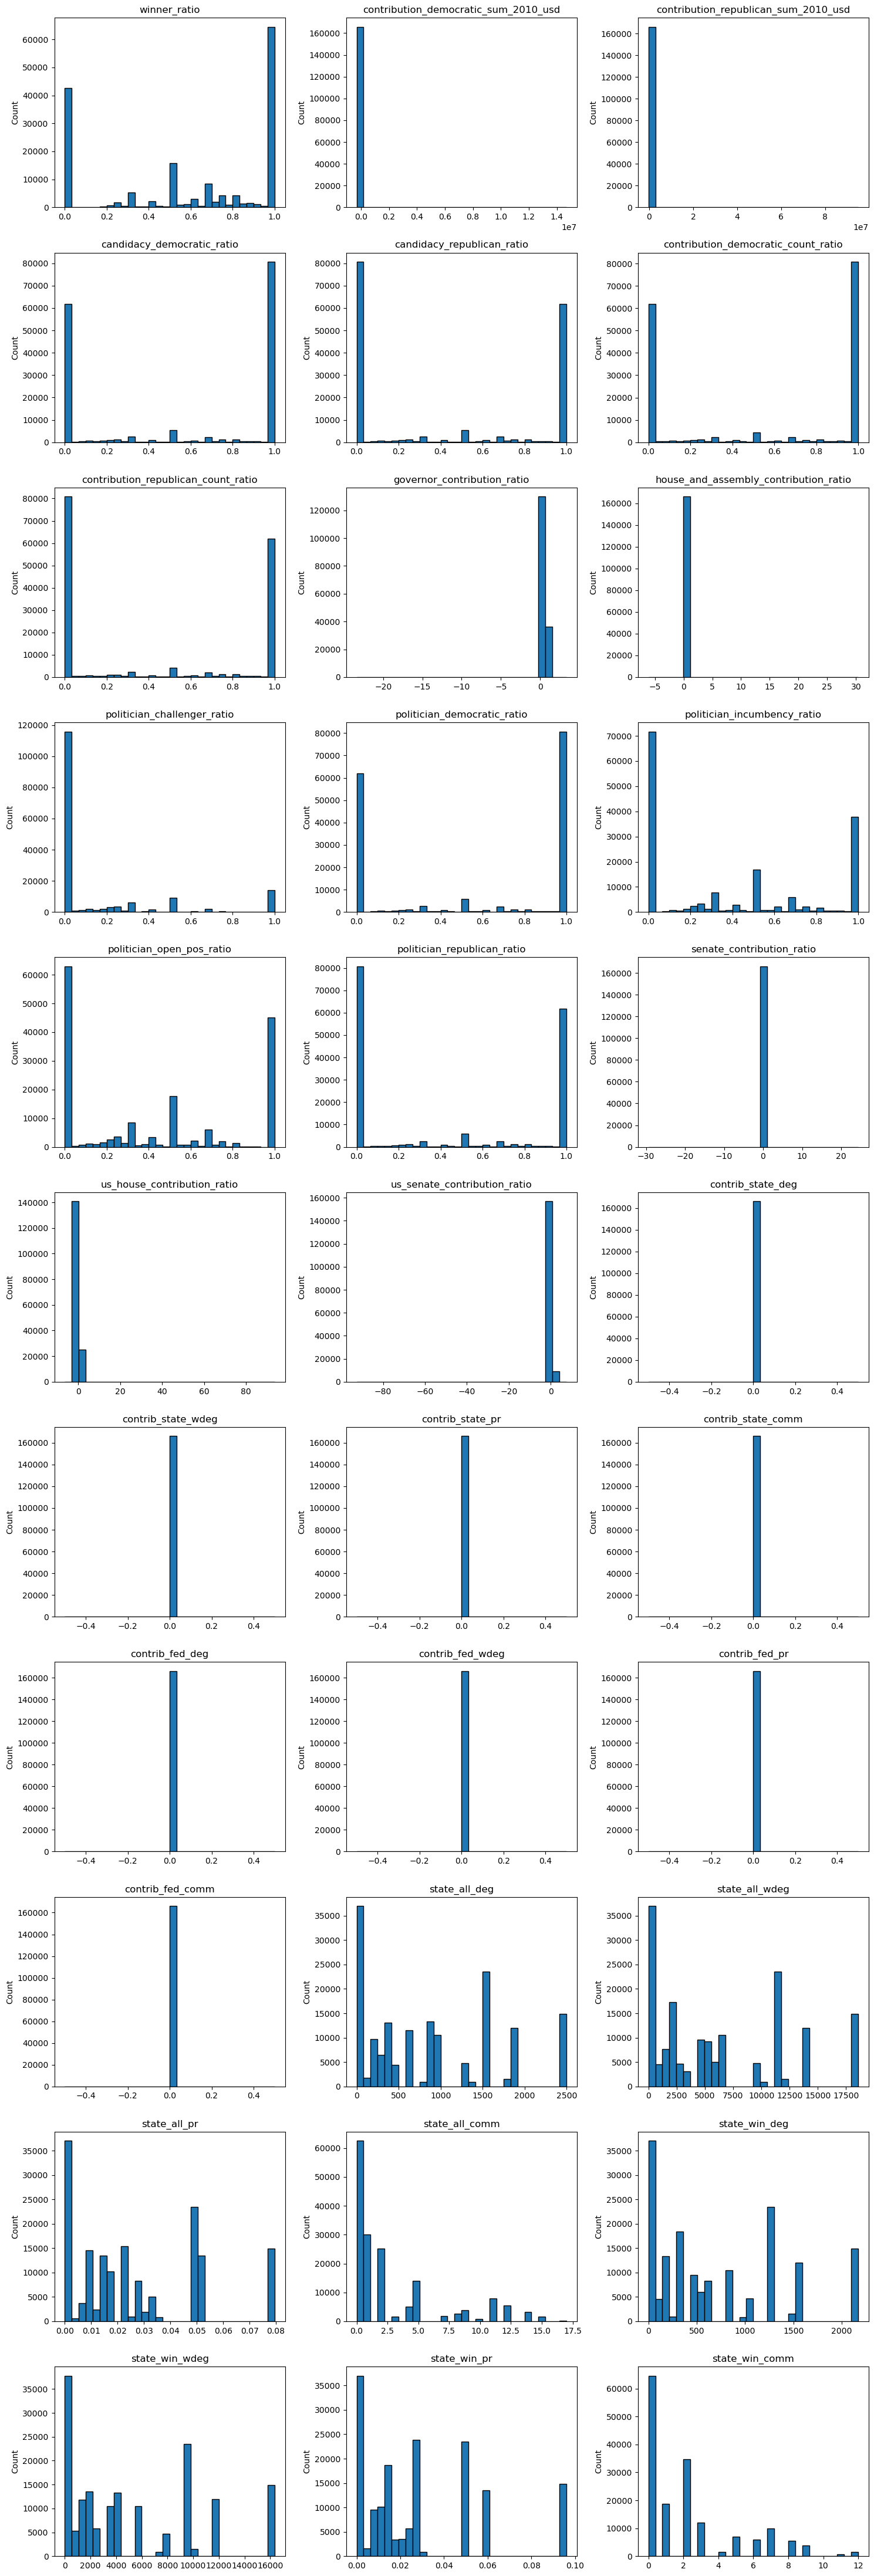

In [26]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


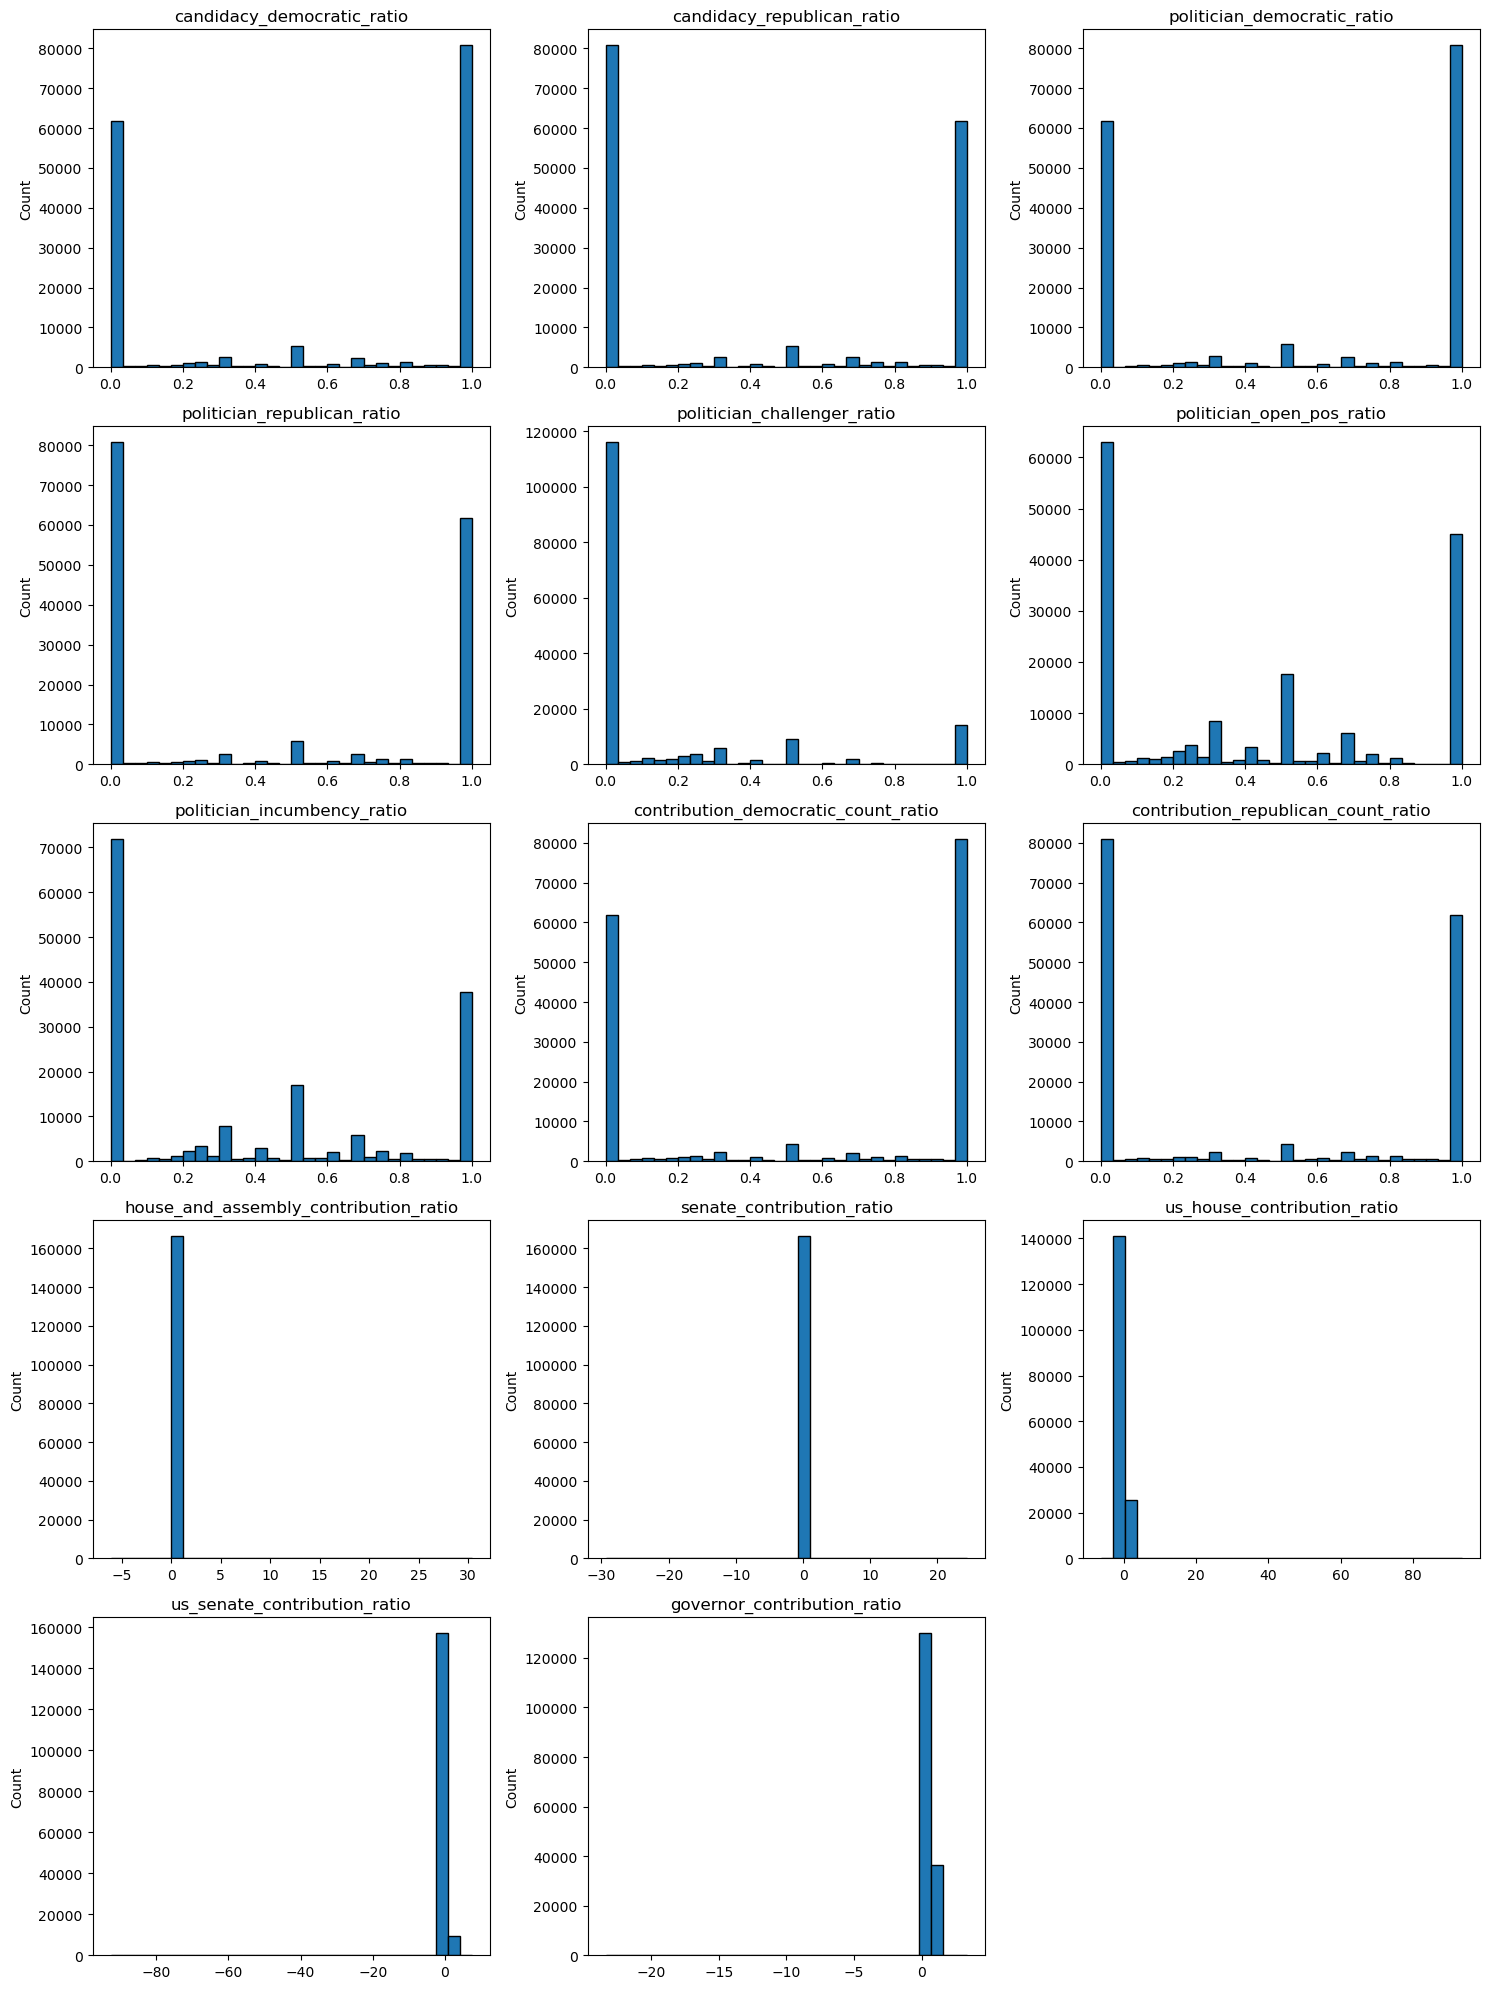

In [27]:

plot_histograms(train, ratio_cols)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [28]:
import numpy as np
import pandas as pd


THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())



Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.488061
politician_challenger_ratio      0.319815
politician_open_pos_ratio        0.254705
governor_contribution_ratio      0.137031
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'general_sector_new', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_challe

In [29]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [30]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'govern

In [31]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['state', 'contributor_type', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'politician_

### Treat Network data columns

In [32]:
features["cat_vars"]

['state', 'contributor_type', 'general_sector_new']

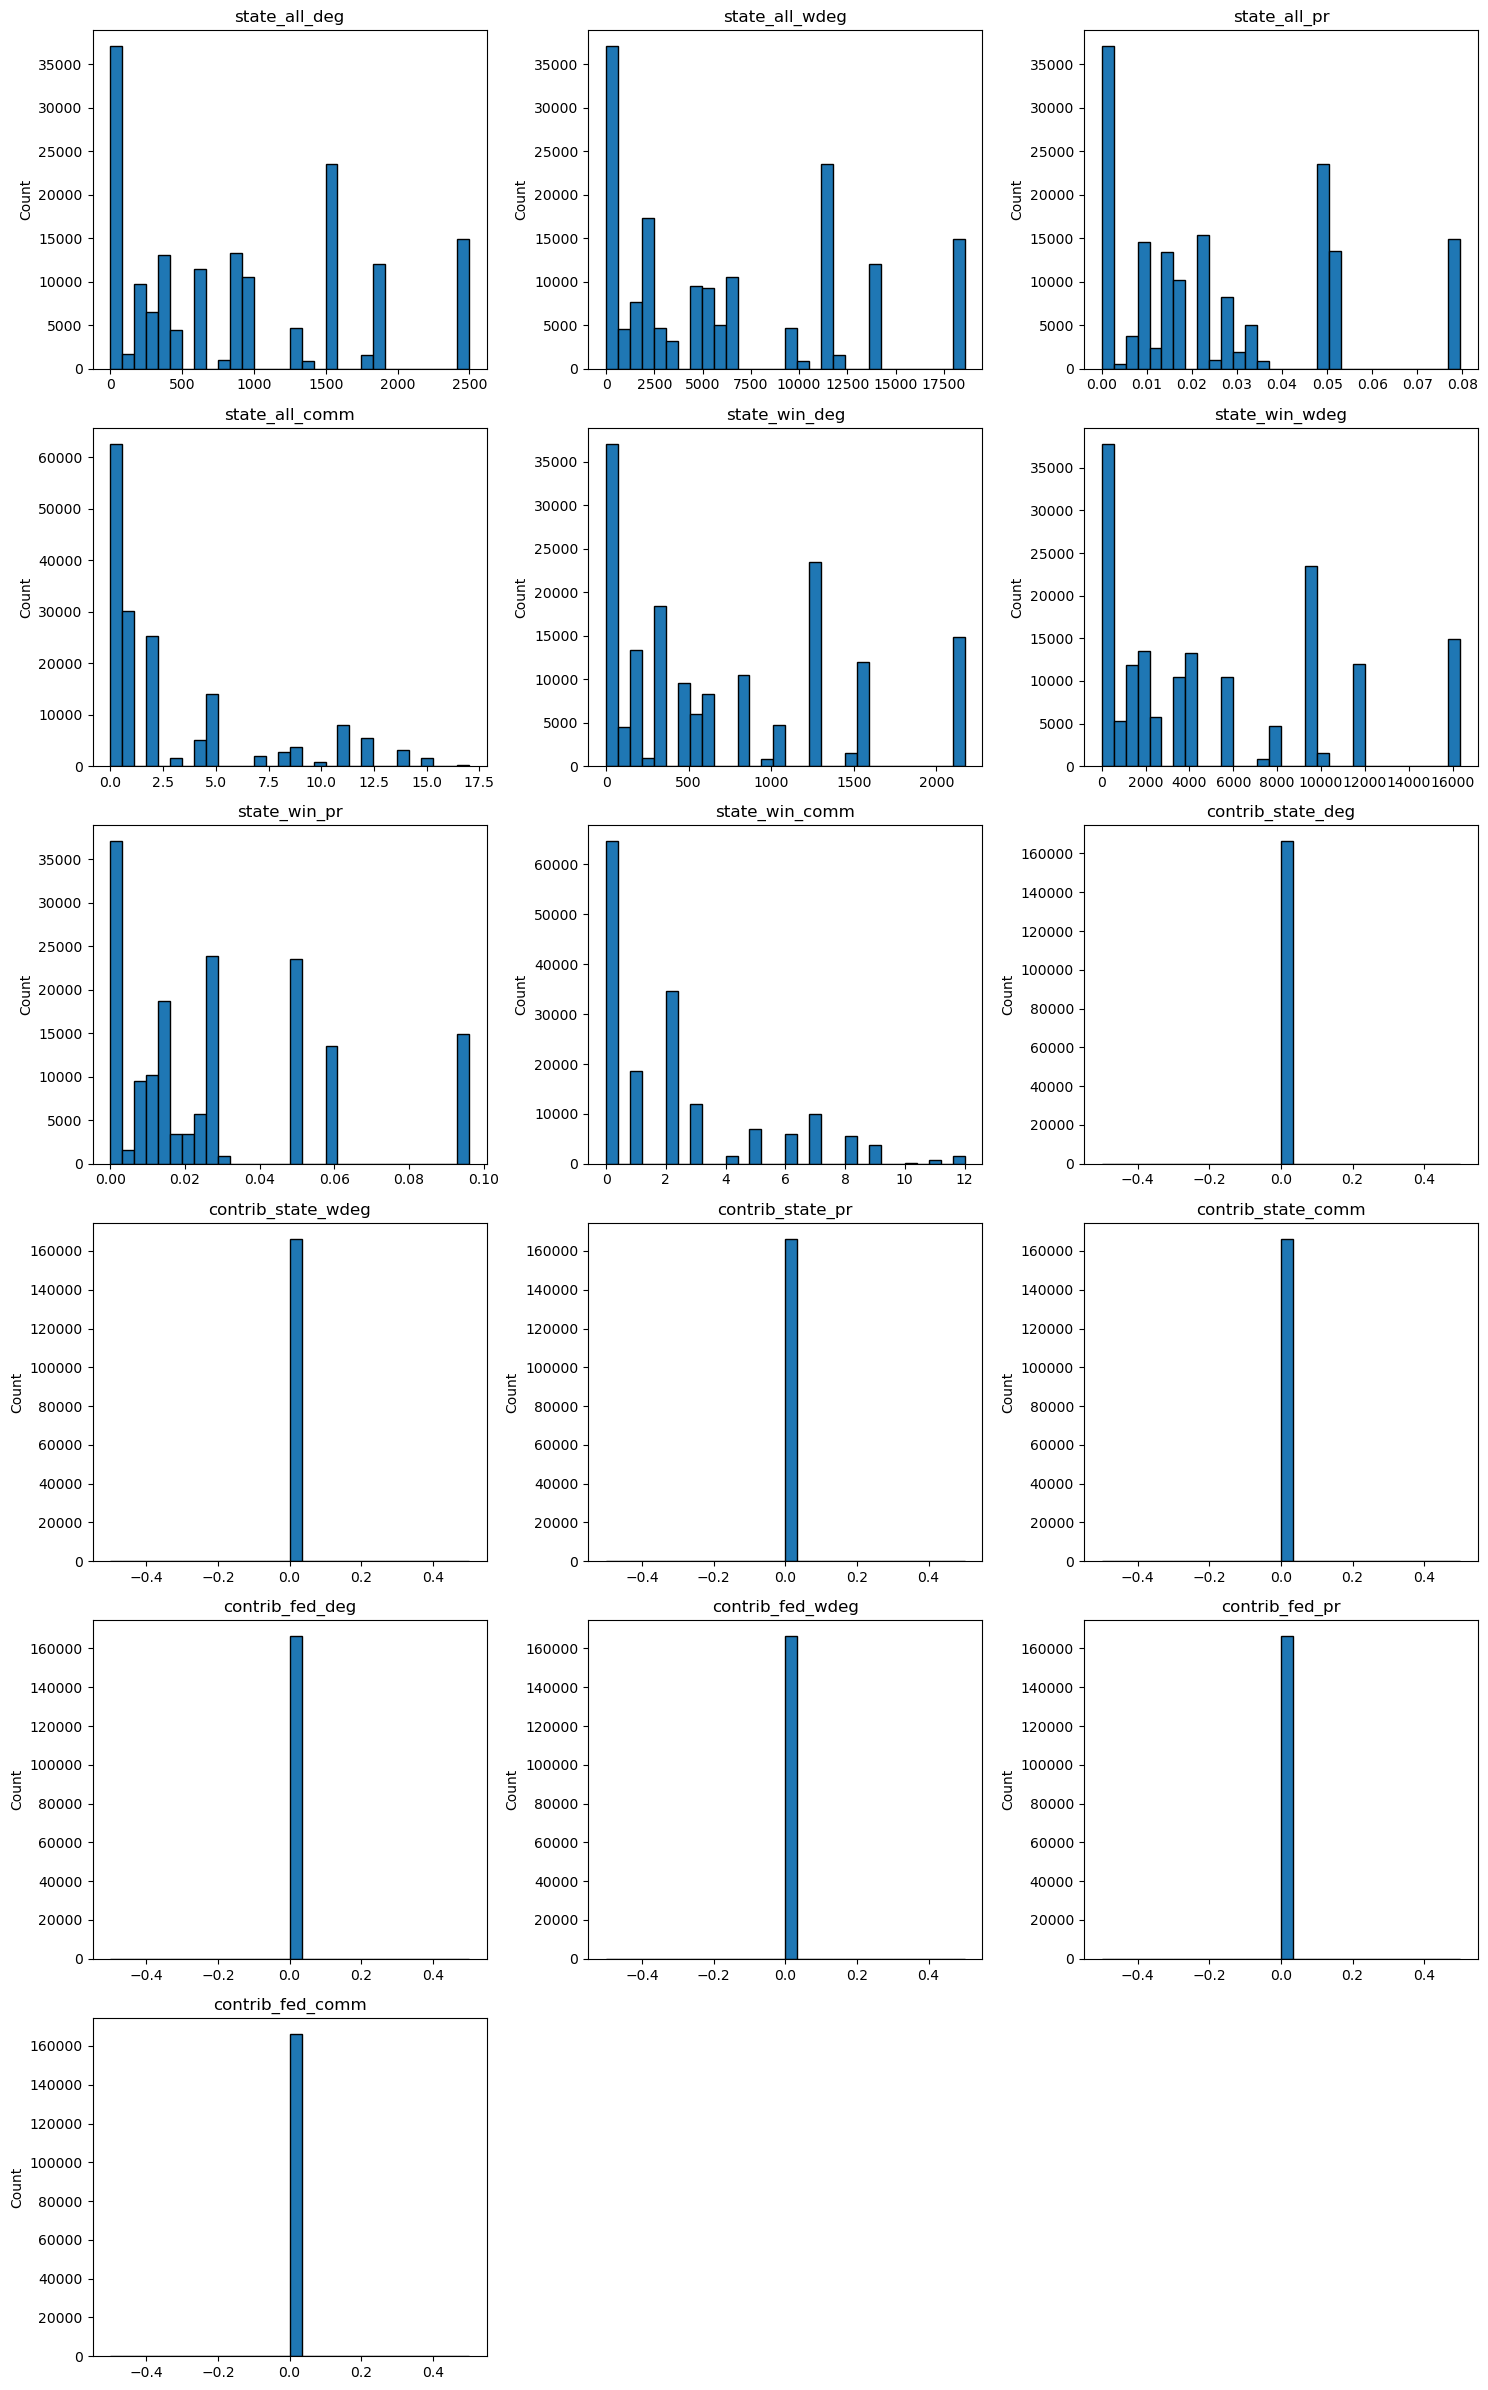

In [33]:

network_cols = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
]

plot_histograms(train, network_cols)


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# ---------------------------------
X = train[non_constant].copy()

# a) log1p
X_log  = np.log1p(X)

# b) Yeo‑Johnson – uncomment if you have negatives
# pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# ---------------------------------
# 4. Correlation with the target
# ---------------------------------
y = train['winner_ratio']

pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

print("\n=== Pearson (after log1p) ===")
print(pearson)

print("\n=== Spearman (rank‑based, raw values) ===")
print(spearman)


Dropping 8 constant columns

=== Pearson (after log1p) ===
state_win_comm    0.007294
state_all_comm    0.005211
state_all_wdeg   -0.014533
state_win_wdeg   -0.015299
state_all_deg    -0.016563
state_win_deg    -0.017559
state_win_pr     -0.032553
state_all_pr     -0.038107
dtype: float64

=== Spearman (rank‑based, raw values) ===
state_win_comm    0.010178
state_all_comm   -0.003357
state_all_deg    -0.012748
state_win_wdeg   -0.012795
state_win_deg    -0.013261
state_all_wdeg   -0.013273
state_win_pr     -0.015181
state_all_pr     -0.017983
dtype: float64


In [35]:
from sklearn.preprocessing import PowerTransformer

# 1) fit Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson", standardize=False)
X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
                     columns=non_constant, index=train.index)

# 2) Pearson corr on Yeo‑Johnson
pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


Pearson after Yeo‑Johnson:
 state_win_comm    0.004449
state_all_comm   -0.003177
state_all_wdeg   -0.029796
state_win_wdeg   -0.029854
state_win_deg    -0.030521
state_all_deg    -0.030768
state_win_pr     -0.041155
state_all_pr     -0.041959
dtype: float64


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [36]:
train.drop(network_cols, axis=1, inplace= True)
test.drop(network_cols, axis=1, inplace= True)

In [37]:
for col in network_cols:
    features['train_num_vars'].remove(col)
    # features['test_num_vars'].remove(col)

In [38]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [39]:
def dropZeroRecords(df, cols):
    for col in cols:
        print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_total_sum_2010_usd"]
train = dropZeroRecords(train, cols)
test = dropZeroRecords(train, cols)

# Zero records in contribution_total_sum_2010_usd are (181, 19)
# Zero records in contribution_total_sum_2010_usd are (0, 19)


In [40]:
def dropNegRecords(df, col):
    for col in cols:
        print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
train = dropNegRecords(train, cols)
print("\n\n")
test = dropNegRecords(test, cols)

# Neg records in contribution_democratic_sum_2010_usd are (23, 19)
# Neg records in contribution_republican_sum_2010_usd are (36, 19)



# Neg records in contribution_democratic_sum_2010_usd are (23, 19)
# Neg records in contribution_republican_sum_2010_usd are (36, 19)


In [41]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


In [42]:
features['cat_vars']

['state', 'contributor_type', 'general_sector_new']

In [43]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

features_keep_penalised = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
                               if col not in features["logit_vars"]]


# features_tree   = create_feature_lists(train)
# features["train_num_vars"] += tree_keep['train_num_vars']


# features_nn     = create_feature_lists(train)
# features["train_num_vars"] += nn_keep['train_num_vars']



In [44]:
'dem_sum_ratio' in features['train_num_vars'],  'rep_sum_ratio' in features['train_num_vars']

(True, True)

In [45]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features


cols = ["dem_sum_ratio", "rep_sum_ratio"]
train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)
  

In [46]:
'dem_sum_ratio' in features['train_num_vars']

False

In [47]:
'dem_sum_ratio' in features['train_num_vars']

False

In [48]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_rat

In [49]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

set()

In [50]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


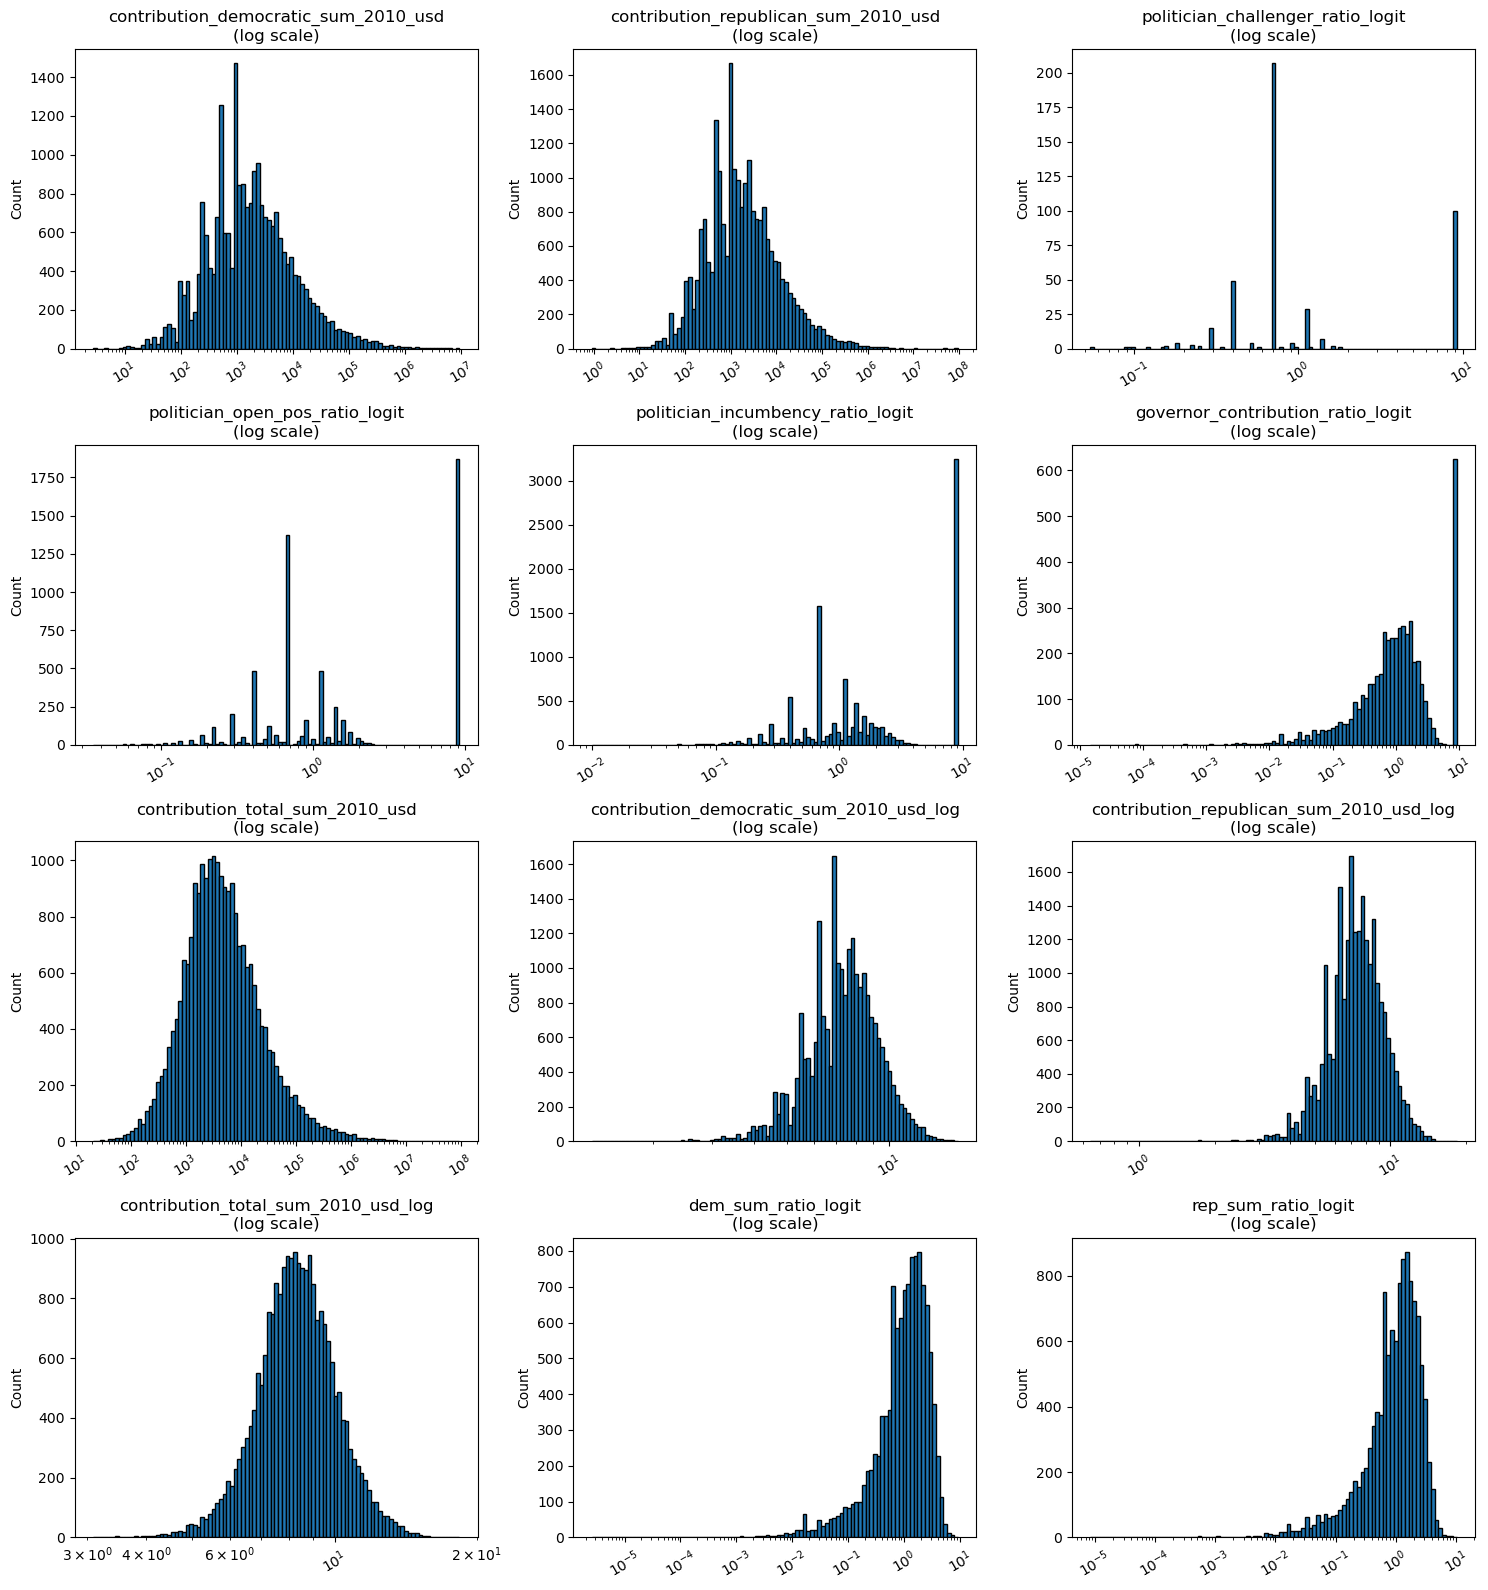

In [52]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [53]:
train_bkp = train.copy()

In [54]:
import numpy as np
from scipy.stats import skew

# 1) List all nonnegative columns you’d like to check
to_check = [
    'contribution_democratic_sum_2010_usd',"contribution_republican_sum_2010_usd",
    'contribution_total_sum_2010_usd'
]

# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  contribution_democratic_sum_2010_usd  32.518
  contribution_republican_sum_2010_usd  118.573
  politician_challenger_ratio_logit   0.635
  politician_open_pos_ratio_logit   0.059
  politician_incumbency_ratio_logit  -0.067
  governor_contribution_ratio_logit   0.550
  contribution_total_sum_2010_usd  107.048
  contribution_democratic_sum_2010_usd_log   0.455
  contribution_republican_sum_2010_usd_log   0.508
  contribution_total_sum_2010_usd_log   0.584
  dem_sum_ratio_logit    0.104
  rep_sum_ratio_logit   -0.104


### Drop actual contribution_sum columns for both REP and DEM

In [55]:

cols_to_drop = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_total_sum_2010_usd']

train, features = drop_extra_cols(train, features, cols_to_drop)
test, features = drop_extra_cols(test, features, cols_to_drop)

## Check VIF among numerical columns

In [56]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                                    feature           VIF
7                       dem_sum_ratio_logit           inf
8                       rep_sum_ratio_logit           inf
5  contribution_republican_sum_2010_usd_log  8.498678e+05
4  contribution_democratic_sum_2010_usd_log  8.456263e+05
6       contribution_total_sum_2010_usd_log  4.823344e+02
0         politician_challenger_ratio_logit  3.690804e+00
1           politician_open_pos_ratio_logit  3.507074e+00
2         politician_incumbency_ratio_logit  3.185894e+00
3         governor_contribution_ratio_logit  2.078364e+00


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Check correlation of numerical variables with target variable

In [57]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit           0.536305
politician_open_pos_ratio_logit            -0.366763
politician_challenger_ratio_logit          -0.257657
contribution_republican_sum_2010_usd_log    0.253870
contribution_total_sum_2010_usd_log         0.251592
governor_contribution_ratio_logit          -0.231964
contribution_democratic_sum_2010_usd_log    0.204181
rep_sum_ratio_logit                         0.061244
dem_sum_ratio_logit                        -0.061244
dtype: float64


In [58]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit           0.597792
contribution_republican_sum_2010_usd_log    0.223642
contribution_total_sum_2010_usd_log         0.216085
contribution_democratic_sum_2010_usd_log    0.168263
rep_sum_ratio_logit                         0.068201
dem_sum_ratio_logit                        -0.068200
governor_contribution_ratio_logit          -0.245674
politician_challenger_ratio_logit          -0.292907
politician_open_pos_ratio_logit            -0.436844
dtype: float64

In [59]:
cols_to_drop_later = ['dem_sum_ratio_logit']

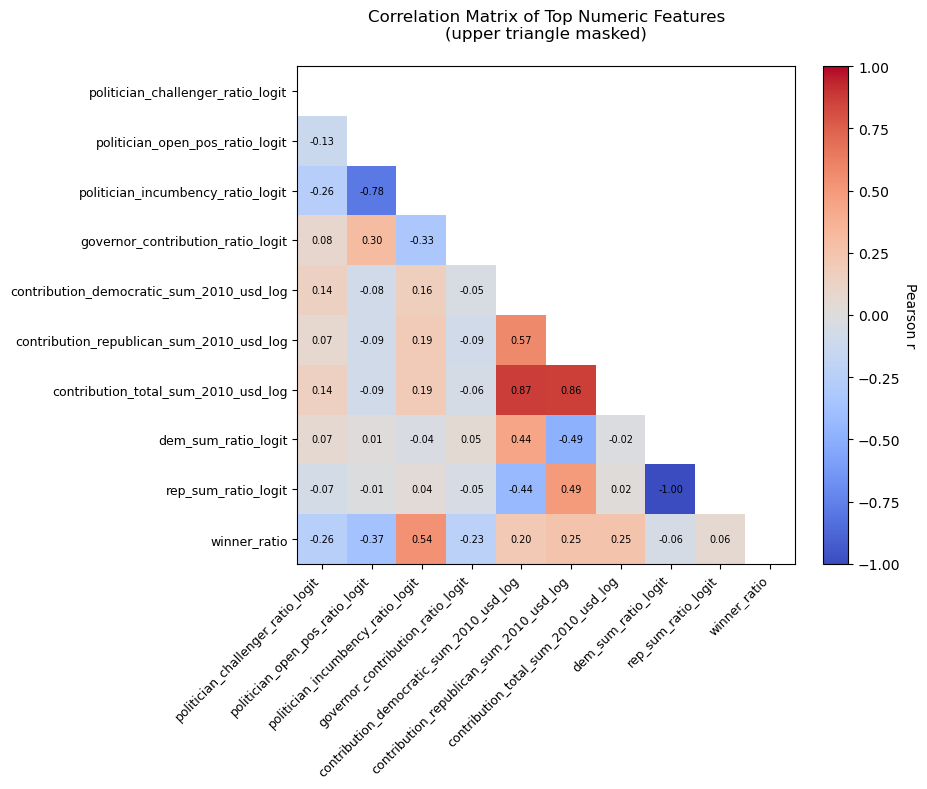

In [60]:
import matplotlib.pyplot as plt


train_num_vars = features['train_num_vars'] + [features['tar_var']]

# 2) Compute the correlation matrix
corr = train[train_num_vars].corr()

# 3) Build a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap, masking out the upper triangle
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(np.ma.masked_where(mask, corr), 
               cmap=cmap, vmin=-1, vmax=1)

# Set tick labels
ax.set_xticks(np.arange(len(train_num_vars)))
ax.set_yticks(np.arange(len(train_num_vars)))
ax.set_xticklabels(train_num_vars, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(train_num_vars, fontsize=9)

# Annotate each cell in the lower triangle with its correlation value
for i in range(len(train_num_vars)):
    for j in range(len(train_num_vars)):
        if not mask[i, j]:  # only annotate lower triangle
            val = corr.iloc[i, j]
            ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                    color='black', fontsize=7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r", rotation=270, labelpad=12)

ax.set_title("Correlation Matrix of Top Numeric Features\n(upper triangle masked)", pad=20)
plt.tight_layout()
plt.show()

### Pipeline to split data, encode categorical columns, and then model building

## Model training on transformed tar_var

In [61]:
train_bkp = train.copy()

In [91]:
train = train_bkp.copy()

In [95]:
train.columns

Index(['state', 'contributor_type', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit', 'rep_sum_ratio_logit']

## Experiment 1

In [94]:
# ──────────────────────────────────────────────────────────────────────────────
# Kaggle campaign‑contribution contest – binomial GLM baseline
# Author: drop‑in for Spring‑2025 ISML assignment
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from time import perf_counter
train = train_bkp.copy()
# ──────────────────────────────────────────────────────────────────────────────
# helpers
# ──────────────────────────────────────────────────────────────────────────────
t0 = perf_counter(); tick = lambda m: print(f"[{perf_counter()-t0:6.2f}s] {m}")

def lowess_line(ax, y_true, y_pred, frac=.25, c='crimson'):
    eps = 1e-4
    yt = np.clip(y_true, eps, 1-eps); yp = np.clip(y_pred, eps, 1-eps)
    smth = lowess(yp, yt, frac=frac, it=0, return_sorted=True)
    ax.plot(smth[:,0], smth[:,1], lw=2.5, c=c)

# ──────────────────────────────────────────────────────────────────────────────
# 1 · split data
# ──────────────────────────────────────────────────────────────────────────────
tick("loading & splitting")
y_ratio = train.pop("winner_ratio").values                                # proportion
X       = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
        X, y_ratio, test_size=.20, random_state=42)

# ──────────────────────────────────────────────────────────────────────────────
# 2 · rebuild counts (successes / trials)
# ──────────────────────────────────────────────────────────────────────────────
for df in (X_tr, X_val):
    if "politician_count" not in df:
        raise ValueError("politician_count column required for binomial model")

trials_tr = X_tr["politician_count"].to_numpy().clip(1)          # avoid zero
trials_val= X_val["politician_count"].to_numpy().clip(1)

# winners cannot exceed trials due to rounding – enforce integrity
wins_tr  = np.minimum(np.round(y_tr_ratio * trials_tr).astype(int), trials_tr)
wins_val = np.minimum(np.round(y_val_ratio* trials_val).astype(int), trials_val)

# proportion after integer rounding (used only for plotting / metrics)
y_tr  = wins_tr  / trials_tr
y_val = wins_val / trials_val

# ──────────────────────────────────────────────────────────────────────────────
# 3 · preprocess → dense design matrix
# ──────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(),                     num_cols)],
        sparse_threshold=0.3)

tick("fitting preprocessor")
X_tr_mat  = pre.fit_transform(X_tr).astype(float)
X_val_mat = pre.transform( X_val).astype(float)

# statsmodels needs an intercept column
X_tr_sm  = sm.add_constant(X_tr_mat,  has_constant="add")
X_val_sm = sm.add_constant(X_val_mat, has_constant="add")

# ──────────────────────────────────────────────────────────────────────────────
# 4 · binomial GLM (logit link)
# ──────────────────────────────────────────────────────────────────────────────
tick("training binomial GLM")
glm_binom = sm.GLM(
        endog = wins_tr, exog = X_tr_sm,
        family = sm.families.Binomial(),              # logit by default
        var_weights = trials_tr                       # each obs gets its #trials
)
res = glm_binom.fit(maxiter=100, method="lbfgs")      # faster optimiser

print(res.summary().tables[0])

# ──────────────────────────────────────────────────────────────────────────────
# 5 · predictions, metrics
# ──────────────────────────────────────────────────────────────────────────────
pred_prob = res.predict(X_val_sm).clip(0,1)           # already probabilities

mse = ((pred_prob - y_val_ratio)**2).mean()
r2  = 1 - ( (pred_prob - y_val_ratio)**2 ).sum() / ((y_val_ratio - y_val_ratio.mean())**2).sum()
print(f"\nValidation: MSE={mse:.5f}   R²={r2:.3f}")

# ──────────────────────────────────────────────────────────────────────────────
# 6 · diagnostic plot
# ──────────────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_val_ratio, pred_prob, s=12, alpha=.35)
ax.plot([0,1],[0,1],'k--',lw=1)
lowess_line(ax, y_val_ratio, pred_prob)
ax.set_xlabel("Actual winner_ratio")
ax.set_ylabel("Predicted winner_ratio")
ax.set_title(f"Binomial GLM  (MSE={mse:.4f}, R²={r2:.3f})")
plt.tight_layout(); plt.show(); tick("done")


[  0.00s] loading & splitting


ValueError: politician_count column required for binomial model

### Experiment 2

[  0.00s] Loading & splitting data
[  0.05s] Fitting ElasticNet on raw target


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


▶ Raw-target ElasticNet  val MSE = 0.04244
[  7.98s] Fitting ElasticNet with arcsin‑√ target transform


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

▶ Arcsin√-target ElasticNet  val MSE = 0.04409



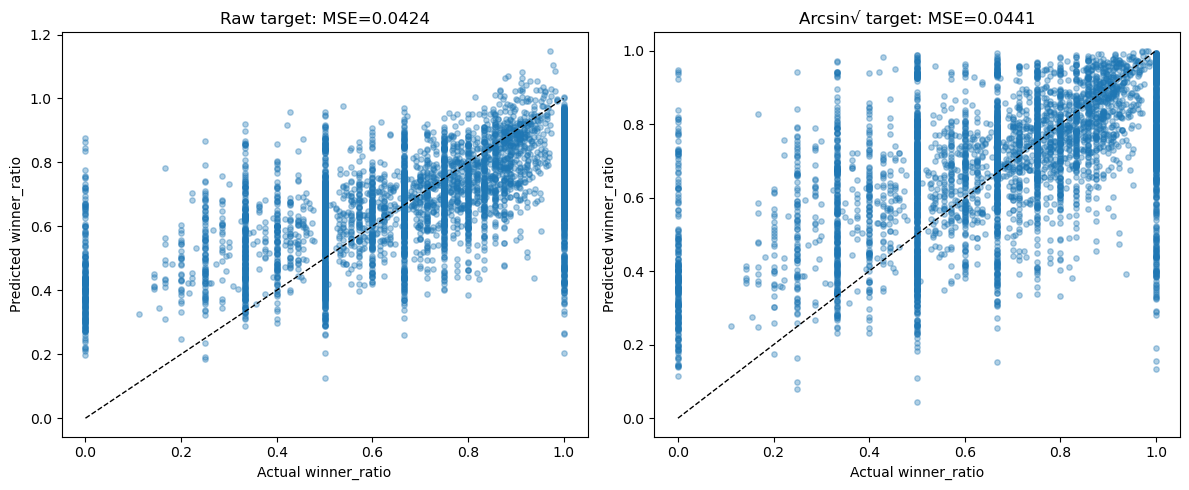

[ 15.23s] Done


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection           import train_test_split
from sklearn.preprocessing             import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose                   import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline                  import Pipeline
from sklearn.linear_model              import ElasticNetCV
from sklearn.metrics                   import mean_squared_error

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timing helper (optional)
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Prepare data
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · ElasticNetCV settings
# ───────────────────────────────────────────────────────────────────────────────
enet = ElasticNetCV(
    l1_ratio=[0.1,0.3,0.5,0.7,0.9,1.0],
    alphas=np.logspace(-4,1,30),
    cv=15,
    max_iter=50_000,    # increase for convergence
    tol=1e-3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Pipeline A: Raw target
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting ElasticNet on raw target")
pipe_raw = Pipeline([
    ("pre", pre),
    ("enet", enet)
])
pipe_raw.fit(X_tr, y_tr)

y_pred_raw = pipe_raw.predict(X_val)
mse_raw    = mean_squared_error(y_val, y_pred_raw)
print(f"\n▶ Raw-target ElasticNet  val MSE = {mse_raw:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Pipeline B: arcsin‑√–transformed target
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting ElasticNet with arcsin‑√ target transform")
asin_sqrt = FunctionTransformer(
    func         = lambda u: np.arcsin(np.sqrt(u)),
    inverse_func = lambda v: np.sin(v)**2,
    validate     = True
)

ttr = TransformedTargetRegressor(
    regressor   = enet,
    transformer = asin_sqrt
)

pipe_ttr = Pipeline([
    ("pre", pre),
    ("ttr", ttr)
])
pipe_ttr.fit(X_tr, y_tr)

y_pred_ttr = pipe_ttr.predict(X_val)
mse_ttr    = mean_squared_error(y_val, y_pred_ttr)
print(f"▶ Arcsin√-target ElasticNet  val MSE = {mse_ttr:.5f}\n")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Diagnostic plots
# ───────────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Raw target
axes[0].scatter(y_val, y_pred_raw, alpha=0.35, s=15)
axes[0].plot([0,1],[0,1],"k--", lw=1)
axes[0].set_title(f"Raw target: MSE={mse_raw:.4f}")
axes[0].set_xlabel("Actual winner_ratio")
axes[0].set_ylabel("Predicted winner_ratio")

# Arcsin‑√ target
axes[1].scatter(y_val, y_pred_ttr, alpha=0.35, s=15)
axes[1].plot([0,1],[0,1],"k--", lw=1)
axes[1].set_title(f"Arcsin√ target: MSE={mse_ttr:.4f}")
axes[1].set_xlabel("Actual winner_ratio")
axes[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()
tick("Done")


In [70]:
train = train_bkp.copy()

[ 0.00s] Data split
[ 0.00s] Preprocessor defined
[ 0.04s] Data preprocessed
[ 0.04s] Fitting LightGBM…
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 20
[LightGBM] [Info] Start training from score 0.680446


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[ 7.93s] LGBM val MSE = 0.0425
[ 7.93s] Fitting ElasticNetCV…
[10.73s] ENet val MSE = 0.0435
[10.73s] Fitting StackingRegressor…
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 20
[LightGBM] [Info] Start training from score 0.680446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2310
[LightGBM] [Info] Number of data points in the train set: 15148, number of used features: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003831 seconds.
You can 

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with f

[55.29s] Stack val MSE = 0.0411


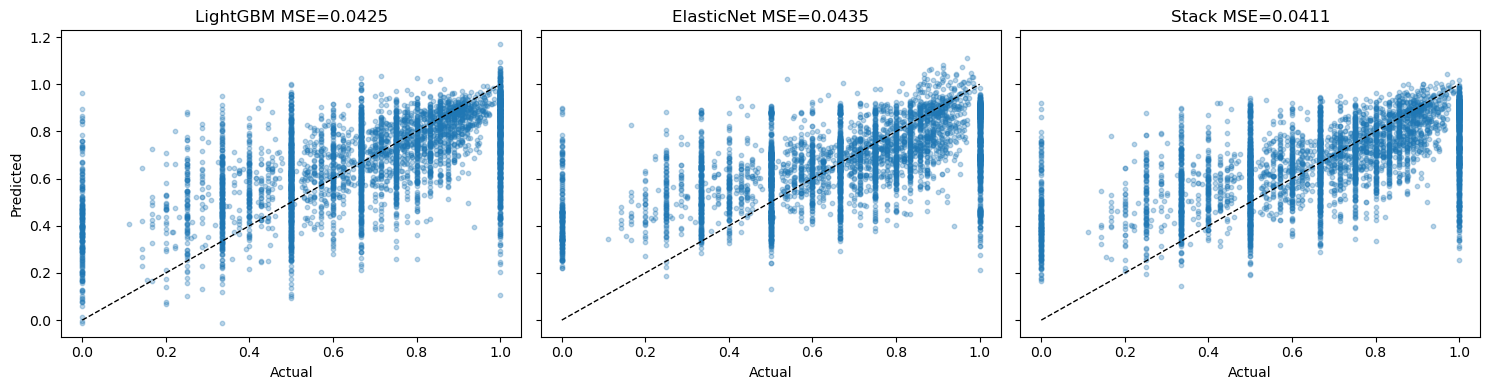

In [76]:
import numpy as np
import pandas as pd
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.linear_model    import ElasticNetCV
from sklearn.ensemble        import StackingRegressor
from sklearn.metrics         import mean_squared_error
from category_encoders       import TargetEncoder
from lightgbm                import LGBMRegressor
train = train_bkp.copy()
# ────────── 0) Setup & split ──────────
t0 = perf_counter()
def tick(msg): print(f"[{perf_counter()-t0:5.2f}s] {msg}")

# assume `train` is your full DataFrame with winner_ratio column
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = [c for c in X.columns if c not in cat_cols]

# 80/20 split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
tick("Data split")

# ────────── 1) Preprocessor ──────────
pre = ColumnTransformer([
    ("te", TargetEncoder(cols=cat_cols),  cat_cols),
    ("sc", StandardScaler(),              num_cols),
], remainder="drop", verbose_feature_names_out=False)
tick("Preprocessor defined")

# fit once
pre.fit(X_tr, y_tr)
# transform to numpy
X_tr_enc  = pre.transform(X_tr)
X_val_enc = pre.transform(X_val)
tick("Data preprocessed")

# ────────── 2) LightGBM with early stopping ──────────
lgb = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
tick("Fitting LightGBM…")
lgb.fit(
    X_tr_enc, y_tr,
    eval_set=[(X_val_enc, y_val)],
    # early_stopping_rounds=50,
    # verbose=False
)
y_val_lgb = lgb.predict(X_val_enc)
mse_lgb   = mean_squared_error(y_val, y_val_lgb)
tick(f"LGBM val MSE = {mse_lgb:.4f}")

# ────────── 3) ElasticNetCV ──────────
enet = ElasticNetCV(
    l1_ratio=[0.1,0.5,0.9],
    alphas=np.logspace(-4,1,20),
    cv=5,
    max_iter=20_000,
    tol=1e-3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
tick("Fitting ElasticNetCV…")
enet.fit(X_tr_enc, y_tr)
y_val_enet = enet.predict(X_val_enc)
mse_enet   = mean_squared_error(y_val, y_val_enet)
tick(f"ENet val MSE = {mse_enet:.4f}")

# ────────── 4) Stacking (LGB + ENet) ──────────
tick("Fitting StackingRegressor…")
stack = StackingRegressor(
    estimators=[
      ("lgb",  Pipeline([("pre", pre), ("lgb",  lgb)])),
      ("enet", Pipeline([("pre", pre), ("enet", enet)]))
    ],
    final_estimator=ElasticNetCV(cv=5, n_jobs=-1, random_state=42),
    n_jobs=-1,
    passthrough=False
)
stack.fit(X_tr, y_tr)  # stack will re‑preprocess internally
y_val_stack = stack.predict(X_val)
mse_stack   = mean_squared_error(y_val, y_val_stack)
tick(f"Stack val MSE = {mse_stack:.4f}")

# ────────── 5) Diagnostics ──────────
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3,figsize=(15,4),sharey=True)

for ax, preds, name in zip(
    axes,
    [y_val_lgb, y_val_enet, y_val_stack],
    ["LightGBM", "ElasticNet", "Stack"]
):
    ax.scatter(y_val, preds, alpha=0.3, s=10)
    ax.plot([0,1],[0,1],"k--",lw=1)
    ax.set_title(f"{name} MSE={mean_squared_error(y_val,preds):.4f}")
    ax.set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_99236/2123854382.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby("bin")[["actual","pred"]].mean().reset_index()


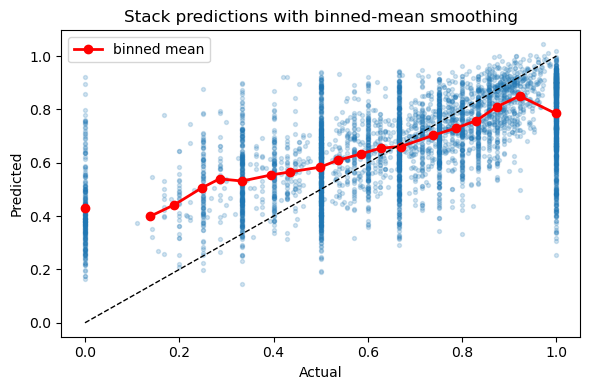

In [77]:
import pandas as pd

df = pd.DataFrame({
    "actual": y_val,
    "pred":   stack.predict(X_val)
})
# bin actuals into 20 equal‐width bins:
df["bin"] = pd.cut(df["actual"], bins=20)
grp = df.groupby("bin")[["actual","pred"]].mean().reset_index()

plt.figure(figsize=(6,4))
plt.scatter(df.actual, df.pred, alpha=0.2, s=8)
plt.plot(grp.actual, grp.pred, "r-o", lw=2, label="binned mean")
plt.plot([0,1],[0,1],"k--", lw=1)
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Stack predictions with binned‐mean smoothing")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757.3504615218262, tolerance: 604.0631842771081
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2608.3596191598917, tolerance: 604.0631842771081
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 20
[LightGBM] [Info] Start training from score 2.594825


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085.1029576573055, tolerance: 472.5420473240026
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2599.7481536108535, tolerance: 482.4345579676242
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2731.4043083285796, tolerance: 470.94426001045025
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Total Bins 2310
[LightGBM] [Info] Number of data points in the train set: 15148, number of used features: 20
[LightGBM] [Info] Number of data points in the train set: 15148, number of used features: 20
[LightGBM] [Info] Number of data points in the train set: 15148, number of used features: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhea

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with f

Logit‑TTR val MSE = 0.07924985705090655


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


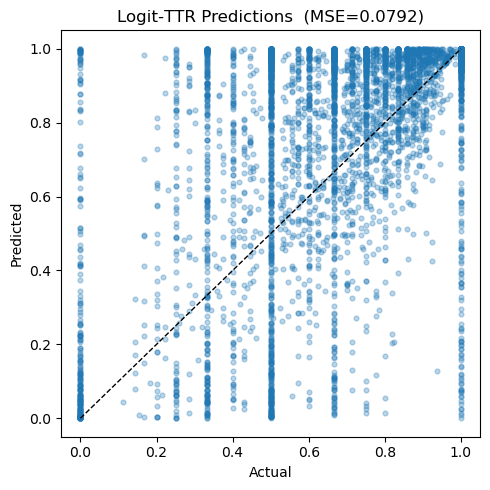

In [78]:
import numpy as np
from sklearn.compose           import TransformedTargetRegressor
from sklearn.preprocessing     import FunctionTransformer
from sklearn.metrics           import mean_squared_error
train = train_bkp.copy()

# epsilon to avoid log(0)
eps = 1e-6

# 1) define the logit transform + inverse
logit_tf = FunctionTransformer(
    func         = lambda y: np.log((y + eps) / (1 - y + eps)),
    inverse_func = lambda z: 1 / (1 + np.exp(-z)),
    validate     = True
)

# 2) wrap your final “stack” (or LGBM, or whatever)
ttr = TransformedTargetRegressor(
    regressor   = stack,    # or `pipe_lgb` or your ElasticNet pipeline
    transformer = logit_tf
)

# 3) fit on training data
ttr.fit(X_tr, y_tr)

# 4) predict & evaluate
y_val_ttr = ttr.predict(X_val)
mse_ttr   = mean_squared_error(y_val, y_val_ttr)
print("Logit‑TTR val MSE =", mse_ttr)

# 5) scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_val, y_val_ttr, alpha=0.3, s=12)
plt.plot([0,1],[0,1],"k--",lw=1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Logit‑TTR Predictions  (MSE={mse_ttr:.4f})")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


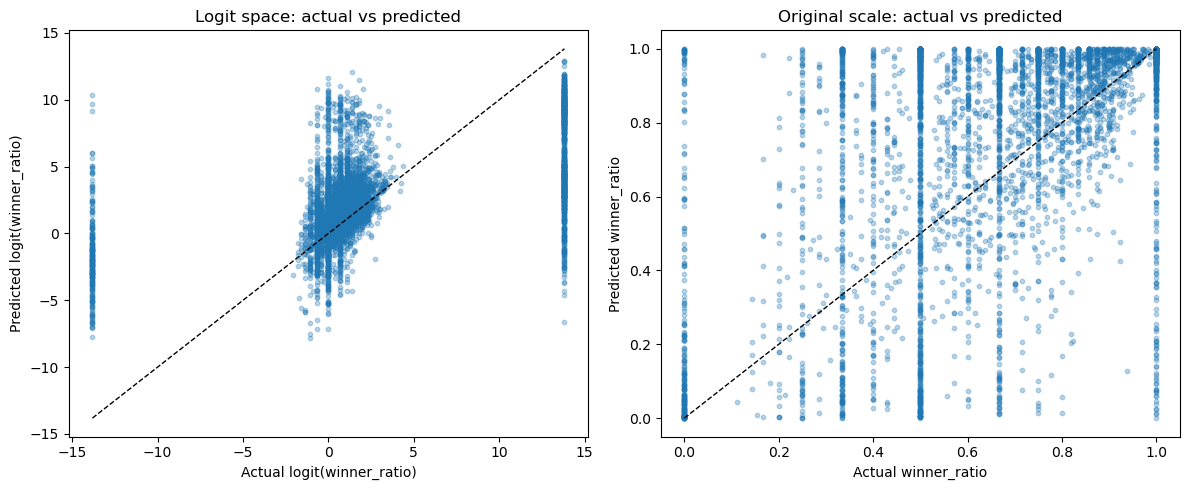

In [80]:
y_val_arr      = np.asarray(y_val).reshape(-1,1)
y_val_logit    = logit_tf.transform(   y_val_arr ).ravel()
y_pred_logit   = ttr.regressor_.predict( X_val       )   # regressor_ is trained on logit(y)

# 2) get predicted back on original scale
y_pred_orig    = ttr.predict( X_val )

# 3) plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# — logit space
axes[0].scatter(y_val_logit, y_pred_logit, alpha=0.3, s=10)
mn, mx = np.nanmin(y_val_logit), np.nanmax(y_val_logit)
axes[0].plot([mn,mx],[mn,mx],'k--', lw=1)
axes[0].set_title("Logit space: actual vs predicted")
axes[0].set_xlabel("Actual logit(winner_ratio)")
axes[0].set_ylabel("Predicted logit(winner_ratio)")

# — original scale
axes[1].scatter(y_val, y_pred_orig, alpha=0.3, s=10)
axes[1].plot([0,1],[0,1],"k--", lw=1)
axes[1].set_title("Original scale: actual vs predicted")
axes[1].set_xlabel("Actual winner_ratio")
axes[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_99236/2123854382.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby("bin")[["actual","pred"]].mean().reset_index()


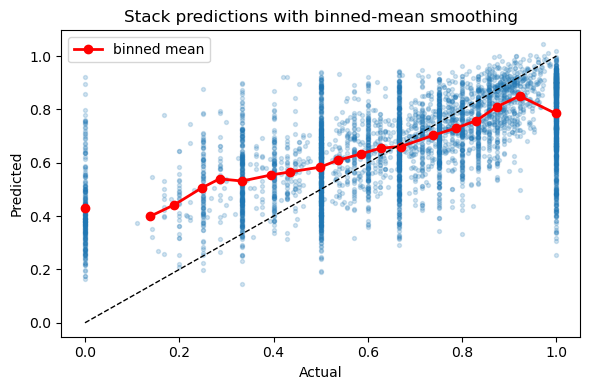

In [79]:
import pandas as pd

df = pd.DataFrame({
    "actual": y_val,
    "pred":   stack.predict(X_val)
})
# bin actuals into 20 equal‐width bins:
df["bin"] = pd.cut(df["actual"], bins=20)
grp = df.groupby("bin")[["actual","pred"]].mean().reset_index()

plt.figure(figsize=(6,4))
plt.scatter(df.actual, df.pred, alpha=0.2, s=8)
plt.plot(grp.actual, grp.pred, "r-o", lw=2, label="binned mean")
plt.plot([0,1],[0,1],"k--", lw=1)
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Stack predictions with binned‐mean smoothing")
plt.tight_layout()
plt.show()


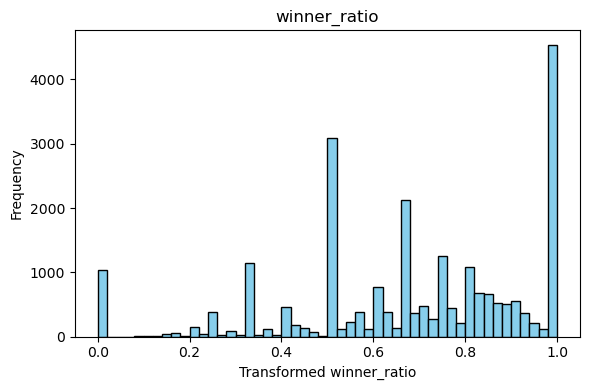

In [81]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(train["winner_ratio"], bins=50, color="skyblue", edgecolor="black")
plt.title("winner_ratio")
plt.xlabel("Transformed winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# x = y_true (actual),  y = y_pred (model output)
smooth = lowess(y, x, frac=0.25, it=0, return_sorted=True)   # frac≈band‑width

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=.05, s=8, label='points')            # light scatter
plt.plot(smooth[:,0], smooth[:,1], c='red', lw=2.5, label='LOWESS')
plt.plot([0,1], [0,1], 'k--', lw=1, label='ideal 45°')       # reference
plt.xlabel('Actual winner_ratio')
plt.ylabel('Predicted winner_ratio')
plt.legend(); plt.tight_layout()


NameError: name 'x' is not defined

In [ ]:
aaaa

### Model Training Starts on original tar_var

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


[   0.0s] Preparing target & predictors
[   0.0s] Splitting 80/20 train–val
[   0.0s] Building preprocessing pipeline
[   0.0s] Fitting Elastic‑Net CV …


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
....................

[  11.2s] Model fit complete
[  11.2s] Validation MSE = 0.042441
   best α       = 0.0001
   best ℓ₁‑ratio = 0.7


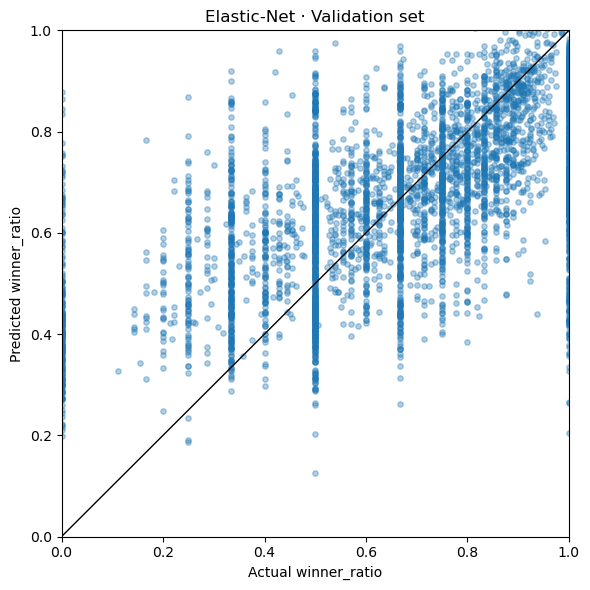

[  11.2s] Finished


In [1867]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV
from sklearn.metrics           import mean_squared_error
from time import perf_counter

# ---------------------------------------------------------
# 0 · basic timing helper
# ---------------------------------------------------------
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.1f}s] {msg}")

# ---------------------------------------------------------
# 1 · target / predictors
# ---------------------------------------------------------
tick("Preparing target & predictors")
y = train.pop("winner_ratio")
X = train

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------
# 3 · preprocessing + model
# ---------------------------------------------------------
tick("Building preprocessing pipeline")
pre = ColumnTransformer(
      [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
       ("num", StandardScaler(),                     num_cols)],
      sparse_threshold=0.3)

enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        alphas=np.logspace(-4, 1, 30),
        cv=15,
        max_iter=20_000,
        n_jobs=-1,
        verbose=1,          # <‑‑ prints CV progress
        random_state=42)

pipe = Pipeline([("pre", pre), ("enet", enet)])

# ---------------------------------------------------------
# 4 · fit
# ---------------------------------------------------------
tick("Fitting Elastic‑Net CV …")
pipe.fit(X_tr, y_tr)
tick("Model fit complete")

# ---------------------------------------------------------
# 5 · evaluate
# ---------------------------------------------------------
y_pred = pipe.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred)
tick(f"Validation MSE = {mse_val:.6f}")
print(f"   best α       = {pipe.named_steps['enet'].alpha_:.4f}")
print(f"   best ℓ₁‑ratio = {pipe.named_steps['enet'].l1_ratio_}")

# ---------------------------------------------------------
# 6 · diagnostic plot
# ---------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.35, s=15)
lim = [0, 1]
plt.plot(lim, lim, c="k", lw=1)
plt.xlim(lim); plt.ylim(lim)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title("Elastic‑Net · Validation set")
plt.tight_layout()
plt.show()
tick("Finished")


In [1869]:
from sklearn.linear_model import ElasticNet

# ----------------------------------------------
# 1 · Extract full feature names after OHE + scale
# ----------------------------------------------
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
num = pipe.named_steps["pre"].named_transformers_["num"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
full_feature_names = np.concatenate([cat_feature_names, num_cols])

# ----------------------------------------------
# 2 · Get coefficients
# ----------------------------------------------
coef = pipe.named_steps["enet"].coef_

feature_importance = pd.Series(coef, index=full_feature_names)
important_feats = feature_importance[feature_importance.abs() > 1e-4].sort_values(ascending=False)

print("Top features:\n", important_feats.head(10))

# ----------------------------------------------
# 3 · Rebuild pipeline using only top features
# ----------------------------------------------
top_feats = important_feats.index.tolist()

# Build a new transformer for only these
pre_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith("state_") or f.startswith("contributor_type_") or f.startswith("general_sector_new_") for f in top_feats)]),
    ("num", StandardScaler(), [f for f in top_feats if f in num_cols])
], sparse_threshold=0.3)

enet_final = ElasticNet(
    alpha=pipe.named_steps["enet"].alpha_,
    l1_ratio=pipe.named_steps["enet"].l1_ratio_,
    max_iter=20000
)

pipe_reduced = Pipeline([("pre", pre_reduced), ("enet", enet_final)])

# ----------------------------------------------
# 4 · Refit and evaluate
# ----------------------------------------------
pipe_reduced.fit(X_tr, y_tr)
y_pred_reduced = pipe_reduced.predict(X_val)
mse_reduced = mean_squared_error(y_val, y_pred_reduced)

print(f"\n📉 Refined model MSE: {mse_reduced:.6f} using {len(top_feats)} features")


Top features:
 politician_incumbency_ratio_logit      0.350137
politician_incumbency_ratio_is_zero    0.156200
state_CO                               0.050972
state_CT                               0.032078
contribution_total_sum_2010_usd_log    0.031930
state_NY                               0.026806
state_NC                               0.026107
state_WA                               0.024012
politician_challenger_ratio_is_one     0.016467
contributor_type_Non-Individual        0.016454
dtype: float64

📉 Refined model MSE: 0.042441 using 53 features


In [1870]:
important_feats

politician_incumbency_ratio_logit                  0.350137
politician_incumbency_ratio_is_zero                0.156200
state_CO                                           0.050972
state_CT                                           0.032078
contribution_total_sum_2010_usd_log                0.031930
state_NY                                           0.026806
state_NC                                           0.026107
state_WA                                           0.024012
politician_challenger_ratio_is_one                 0.016467
contributor_type_Non-Individual                    0.016454
state_VT                                           0.016193
state_MA                                           0.012803
state_MT                                           0.012427
general_sector_new_Construction & Manufacturing    0.012304
state_LA                                           0.011124
state_NM                                           0.010657
general_sector_new_Other / Misc         

In [1871]:
train = train_bkp.copy()

best α      : 0.0001
best l1     : 1.0
val MSE full: 0.04246110409273467


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_64617/2934788945.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


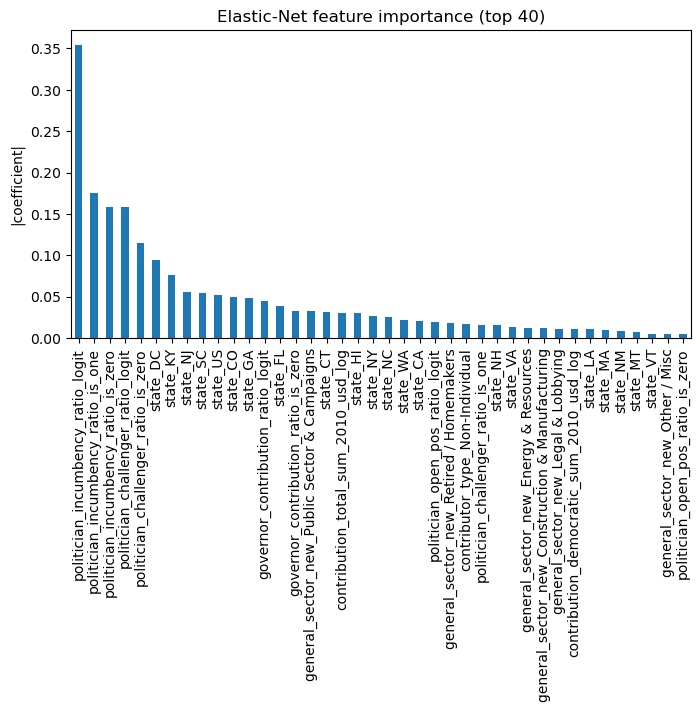

val MSE reduced: 0.042461462679275155


['elasticnet_final.pkl']

In [1872]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV, ElasticNet
from sklearn.metrics           import mean_squared_error
import joblib                   # for saving pipeline

# ---------- raw df ----------
y  = train.pop("winner_ratio")
X  = train
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42)

pre = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
         ("num", StandardScaler(),                     num_cols)],
        sparse_threshold=0.3)

enetcv = ElasticNetCV(
    l1_ratio=[0.1,0.3,0.5,0.7,0.9,1.0],
    alphas=np.logspace(-4,1,30),
    cv=5,
    max_iter=20_000,
    n_jobs=-1,
    verbose=0,
    random_state=42)

pipe_full = Pipeline([("pre", pre), ("enet", enetcv)])
pipe_full.fit(X_tr, y_tr)

print("best α      :", pipe_full['enet'].alpha_)
print("best l1     :", pipe_full['enet'].l1_ratio_)
print("val MSE full:", mean_squared_error(y_val, pipe_full.predict(X_val)))


##### # 2 · Extract importances & scree‑plot
# ------------ get full feature names -------------
ohe = pipe_full['pre'].named_transformers_['cat']
full_feat = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])

coef_full = pd.Series(pipe_full['enet'].coef_, index=full_feat)
imp = coef_full.abs().sort_values(ascending=False)

# 1e‑4 in digits  ➜ 0.0001
threshold = 1e-4        # === 0.0001
top_feats = imp[imp > threshold].index.tolist()

# ------------ scree chart -------------
plt.figure(figsize=(8,4))
imp.head(40).plot(kind='bar')
plt.ylabel("|coefficient|")
plt.title("Elastic‑Net feature importance (top 40)")
plt.tight_layout(); plt.show()

###### 3 · Refit Elastic‑Net on important features
# keep only chosen numeric columns
num_keep = [f for f in top_feats if f in num_cols]

# identify the cat levels actually present in top_feats
cat_keep = [c for c in cat_cols if any(f.startswith(c+"_") for f in top_feats)]

pre_reduced = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_keep),
         ("num", StandardScaler(),                     num_keep)],
        sparse_threshold=0.3)

enet_final = ElasticNet(alpha=pipe_full['enet'].alpha_,
                        l1_ratio=pipe_full['enet'].l1_ratio_,
                        max_iter=20_000,
                        random_state=42)

pipe_final = Pipeline([("pre", pre_reduced), ("enet", enet_final)])
pipe_final.fit(X_tr, y_tr)

print("val MSE reduced:", mean_squared_error(y_val, pipe_final.predict(X_val)))

### → Save pipeline for later / test
joblib.dump(pipe_final, "elasticnet_final.pkl")
# later: pipe_loaded = joblib.load("elasticnet_final.pkl")


In [1880]:
train = train_bkp.copy()

In [ ]:
# ==================================================================================
# 0 · PREP  ------------------------------------------------------------------------
# ==================================================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib, time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose        import ColumnTransformer
from sklearn.pipeline       import Pipeline
from sklearn.metrics        import mean_squared_error
from sklearn.ensemble       import RandomForestRegressor
from xgboost                import XGBRegressor

# raw df ------------------------------------------------
y = train.pop("winner_ratio")
X = train
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# helper to time steps
t0 = time.perf_counter()
tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ==================================================================================
# 1 · MAKE GENERIC BUILD‑AND‑REFIT FUNCTION ----------------------------------------
# ==================================================================================
def tree_workflow(name, base_estimator, param_dist, top_k=40, n_iter=25):
    """
    - RandomizedSearchCV to find best hyper‑params
    - Refit on most important top_k features
    - Return the reduced pipeline + metrics
    """

    tick(f"🔍 {name}: hyper‑param search")
    pre = ColumnTransformer(
            [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
             ("num", "passthrough",                         num_cols)],
            sparse_threshold=0.3)

    pipe = Pipeline([("pre", pre), ("model", base_estimator)])

    search = GridSearchCV(
                pipe, param_dist,
                # n_iter=n_iter, 
                scoring="neg_mean_squared_error",
                cv=3, verbose=0, n_jobs=-1, 
                # random_state=42
                )

    search.fit(X_tr, y_tr)
    best_pipe = search.best_estimator_
    best_model = best_pipe.named_steps["model"]
    tick(f"   best params: {search.best_params_}")

    # full‑model MSE
    mse_val_full = mean_squared_error(y_val, best_pipe.predict(X_val))
    mse_tr_full  = mean_squared_error(y_tr, best_pipe.predict(X_tr))
    tick(f"   full MSE  (train/val) = {mse_tr_full:.4f} / {mse_val_full:.4f}")

    # ------------------ feature names & importance ------------------
    ohe = best_pipe.named_steps["pre"].named_transformers_["cat"]
    feat_names = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])

    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
    else:                                        # XGBRegressor .get_booster()
        importances = best_model.feature_importances_

    imp_series = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    top_feats  = imp_series.head(top_k).index.tolist()

    # deduce which original cols to pass through
    num_keep = [f for f in top_feats if f in num_cols]
    cat_keep = [c for c in cat_cols if any(f.startswith(c + "_") for f in top_feats)]

    pre_reduced = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_keep),
         ("num", "passthrough",                         num_keep)],
        sparse_threshold=0.3)

    model_reduced = base_estimator.__class__(**best_model.get_params())
    pipe_reduced  = Pipeline([("pre", pre_reduced), ("model", model_reduced)])
    pipe_reduced.fit(X_tr, y_tr)

    mse_val_red = mean_squared_error(y_val, pipe_reduced.predict(X_val))
    mse_tr_red  = mean_squared_error(y_tr,  pipe_reduced.predict(X_tr))
    tick(f"   reduced MSE (train/val) = {mse_tr_red:.4f} / {mse_val_red:.4f}")
    tick(f"   kept {len(top_feats)} features")

    # save
    fname = f"{name.lower()}_pipeline.pkl"
    joblib.dump(pipe_reduced, fname)
    tick(f"   pipeline saved → {fname}\n")

    # plot diag
    plt.figure(figsize=(5,5))
    plt.scatter(y_val, pipe_reduced.predict(X_val), alpha=0.3, s=12)
    lim=[0,1]; plt.plot(lim,lim,'k--'); plt.xlim(lim); plt.ylim(lim)
    plt.title(f"{name} (val) MSE={mse_val_red:.4f}")
    plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.tight_layout()
    plt.show()

# ==================================================================================
# 2 · RANDOM FOREST ----------------------------------------------------------------
# ==================================================================================
rf_params = dict(
    model__n_estimators = np.arange(300, 2001, 100),
    model__max_depth    = [None,3,5,7,9],
    model__min_samples_leaf=[1,2,4],
    model__max_features = ["sqrt","log2",0.6]
)

tree_workflow(
    "RandomForest",
    RandomForestRegressor(n_jobs=-1, random_state=42),
    rf_params, top_k=40, n_iter=25
)

# ==================================================================================
# 3 · XGBOOST ----------------------------------------------------------------------
# ==================================================================================
xgb_params = dict(
    model__n_estimators   = np.arange(400, 2001, 200),
    model__learning_rate  = np.linspace(0.02, 0.15, 8),
    model__max_depth      = [3,4,5,6,7],
    model__subsample      = [0.6,0.8,1.0],
    model__colsample_bytree=[0.6,0.8,1.0],
    model__gamma          = [0,0.5,1],
)

tree_workflow(
    "XGBoost",
    XGBRegressor(objective="reg:squarederror",
                 eval_metric="rmse",
                 n_jobs=-1, random_state=42),
    xgb_params, top_k=40, n_iter=30
)


[   0.0s] 🔍 RandomForest: hyper‑param search


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Train MSE: 0.06028522318995205
Validation MSE: 0.10006120020044282


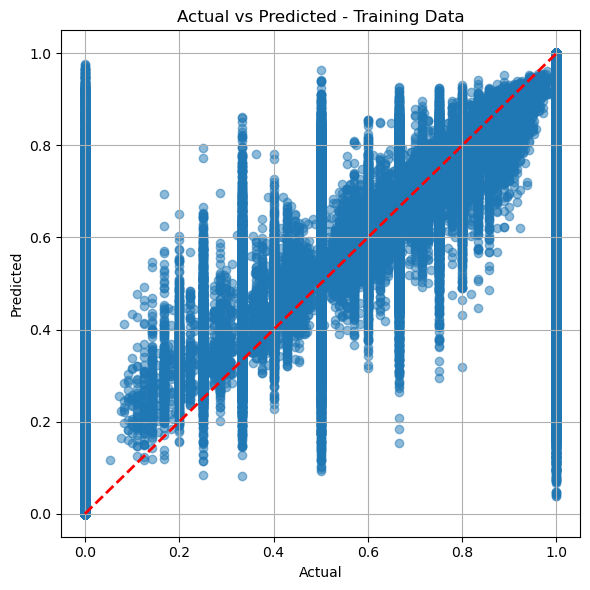

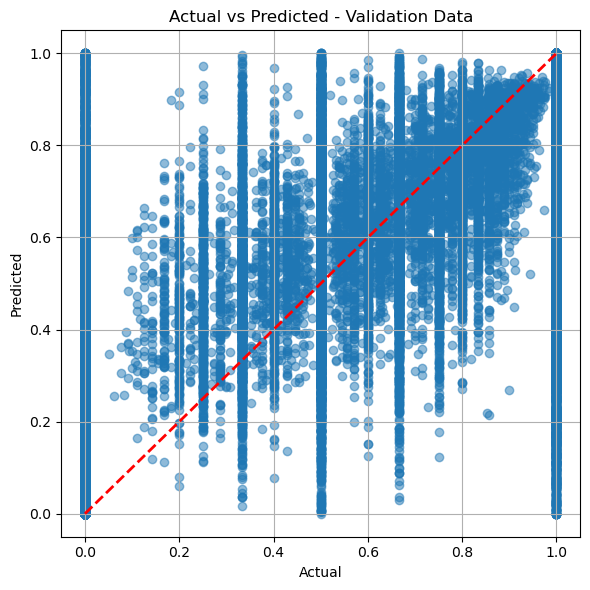

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Initialize Random Forest with fixed parameters
rf_model = RandomForestRegressor(
    n_estimators=45,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit model
rf_model.fit(X_train, y_train)

# ✅ Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# ✅ Evaluation
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Hyperparameter grid
param_grid = {
    'n_estimators': range(1, 50, 5),
    'max_depth': range(1, 30, 5),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# ✅ Model and GridSearch
model3 = RandomForestRegressor(random_state=42)
rf_optimized = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

# ✅ Fit on training data
rf_optimized.fit(X_train, y_train)

# ✅ Predict
y_train_pred = rf_optimized.predict(X_train)
y_val_pred = rf_optimized.predict(X_val)

# ✅ Evaluate
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs. predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


KeyboardInterrupt: 